# **Assignment 01 - DNN optimization**
### Laboratory of Computational Physics, module B
#### AY 2021/2022 University of Padua

## group 02
### students: Barone Francesco Pio, Nagaro Quiroz Gianmarco, Ninni Daniele, Valentini Lorenzo

### initial imports & definitions

In [1]:
try:
    import cayde_env # importing a custom environment for my server
    cayde_env.tensorflow('CPU')
except: print('no need of custom environment')

 [ CAYDE computing env ]
[tf] CPU set

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14    # set the fontsize for plots

# random seed, for reproducibility
my_seed = 220227
np.random.seed(my_seed)
import random
random.seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed)

from keras.models import Sequential
from keras.layers import Dense, Dropout

# import requested functions
%run nonlinear_function.py
%run triangle_code.py

In [3]:
savefigs = True  # save the figures to /img folder
dump_env = True  # create backup copies of the Python kernel
if dump_env: import dill

perc_train = 0.8  # training data percentage
grid_search_threads = -1  # set the threads to be used in CPU gridsearch
#gs_cross_validation = [(slice(None), slice(None))]  # set the crossvalidation ## [(slice(None), slice(None))] means NO CV

## **1** - study the performance of a default DNN varying the number of samples N

### **1A - performance of DNN with reduced number of samples**

data: 1000 > train: 800 
dim: 2


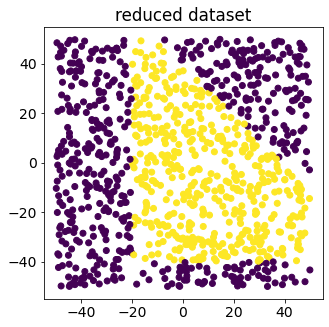

In [4]:
TYPE = 1
x = np.loadtxt(filename('data_reduced', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels_reduced', TYPE), delimiter=' ')
N = len(x);   L = len(x[0]);
N_train = int(perc_train*N)

print(f'data: {N} > train: {N_train} \ndim: {L}')

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('reduced dataset')
if savefigs: plt.savefig('./img/dataset_reduced.pdf')

In [5]:
# split train and test data
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 800 	 Validation: 200


In [6]:
# rescale input data
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train);   x_valid = Rescale(x_valid);

#### define the model with Keras

In [7]:
def create_model_default(case):
    if case == 1:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
    elif case == 2:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
    return model

model = create_model_default(case=1)
nepoch = 400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
fit = model.fit(x_train, y_train, epochs=nepoch, batch_size=100,
                validation_data=(x_valid, y_valid),  verbose=2)

Epoch 1/400
8/8 - 0s - loss: 0.6901 - accuracy: 0.6087 - val_loss: 0.6893 - val_accuracy: 0.5900 - 256ms/epoch - 32ms/step
Epoch 2/400
8/8 - 0s - loss: 0.6860 - accuracy: 0.6037 - val_loss: 0.6866 - val_accuracy: 0.5750 - 13ms/epoch - 2ms/step
Epoch 3/400
8/8 - 0s - loss: 0.6834 - accuracy: 0.5838 - val_loss: 0.6844 - val_accuracy: 0.5650 - 11ms/epoch - 1ms/step
Epoch 4/400
8/8 - 0s - loss: 0.6802 - accuracy: 0.5813 - val_loss: 0.6820 - val_accuracy: 0.5350 - 12ms/epoch - 1ms/step
Epoch 5/400
8/8 - 0s - loss: 0.6797 - accuracy: 0.5725 - val_loss: 0.6798 - val_accuracy: 0.5350 - 16ms/epoch - 2ms/step
Epoch 6/400
8/8 - 0s - loss: 0.6712 - accuracy: 0.5738 - val_loss: 0.6769 - val_accuracy: 0.5400 - 13ms/epoch - 2ms/step
Epoch 7/400
8/8 - 0s - loss: 0.6672 - accuracy: 0.5950 - val_loss: 0.6736 - val_accuracy: 0.5450 - 16ms/epoch - 2ms/step
Epoch 8/400
8/8 - 0s - loss: 0.6632 - accuracy: 0.6037 - val_loss: 0.6701 - val_accuracy: 0.5650 - 11ms/epoch - 1ms/step
Epoch 9/400
8/8 - 0s - loss: 0

#### show the results of the default model

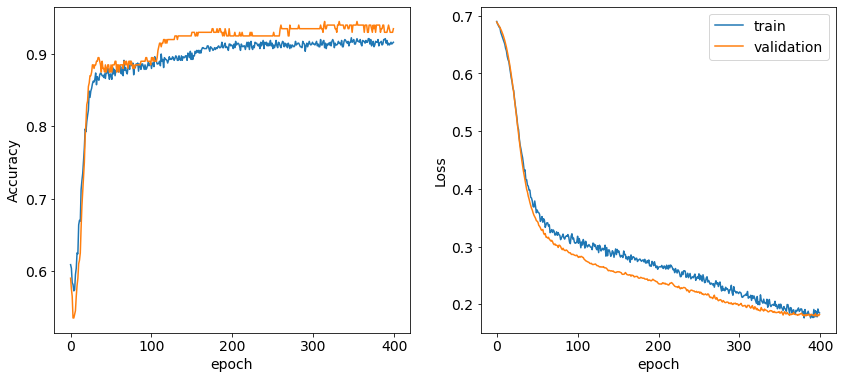

In [10]:
%run triangle_code.py
ax = plot_train_loss(fit)
if savefigs: plt.savefig('./img/dataset_reduced_train.pdf')

#### show the prediction capabilities of the DNN

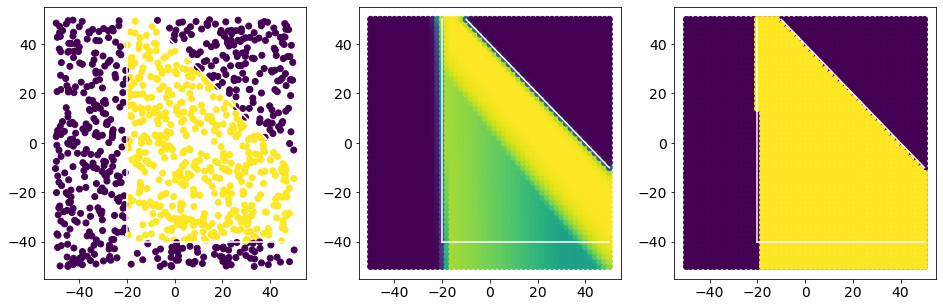

In [11]:
pp = predictions_triangles(x, y, model, Rescale)
if savefigs: plt.savefig('./img/dataset_reduced_predictions.pdf')

In [12]:
if dump_env: dill.dump_session('checkpoint_1a.db')

INFO:tensorflow:Assets written to: ram://675adb8b-1f18-4836-ae76-b904fba720c9/assets


2022-03-17 09:07:09.925454: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


### **1B - performance of DNN with increased number of samples**

data: 20000 > train: 16000 
dim: 2


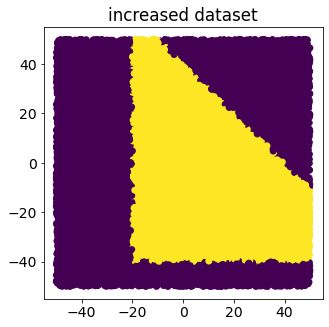

In [13]:
x = np.loadtxt(filename('data_increased', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels_increased', TYPE), delimiter=' ')
N = len(x);   L = len(x[0]);
N_train = int(perc_train*N)

print(f'data: {N} > train: {N_train} \ndim: {L}')

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('increased dataset')
if savefigs: plt.savefig('./img/dataset_increased.pdf')

In [14]:
# split train and test data
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 16000 	 Validation: 4000


In [15]:
# rescale input data  (uses the function defined in 1A!
x_train = Rescale(x_train);   x_valid = Rescale(x_valid);

#### define the model with Keras

In [16]:
# use the same model defined in 1A
model = create_model_default(case=1)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
fit = model.fit(x_train, y_train, epochs=200, batch_size=50,
                validation_data=(x_valid, y_valid), verbose=2)

Epoch 1/200
320/320 - 0s - loss: 0.6013 - accuracy: 0.6216 - val_loss: 0.5197 - val_accuracy: 0.7017 - 332ms/epoch - 1ms/step
Epoch 2/200
320/320 - 0s - loss: 0.4856 - accuracy: 0.7301 - val_loss: 0.4576 - val_accuracy: 0.7408 - 140ms/epoch - 438us/step
Epoch 3/200
320/320 - 0s - loss: 0.4399 - accuracy: 0.7418 - val_loss: 0.4299 - val_accuracy: 0.7395 - 143ms/epoch - 448us/step
Epoch 4/200
320/320 - 0s - loss: 0.4233 - accuracy: 0.7530 - val_loss: 0.4196 - val_accuracy: 0.7673 - 137ms/epoch - 428us/step
Epoch 5/200
320/320 - 0s - loss: 0.4138 - accuracy: 0.7700 - val_loss: 0.4137 - val_accuracy: 0.7900 - 141ms/epoch - 441us/step
Epoch 6/200
320/320 - 0s - loss: 0.4013 - accuracy: 0.8056 - val_loss: 0.3950 - val_accuracy: 0.8315 - 136ms/epoch - 424us/step
Epoch 7/200
320/320 - 0s - loss: 0.3492 - accuracy: 0.8697 - val_loss: 0.2789 - val_accuracy: 0.9205 - 137ms/epoch - 427us/step
Epoch 8/200
320/320 - 0s - loss: 0.2556 - accuracy: 0.9079 - val_loss: 0.2048 - val_accuracy: 0.9293 - 145

#### show the results of the default model

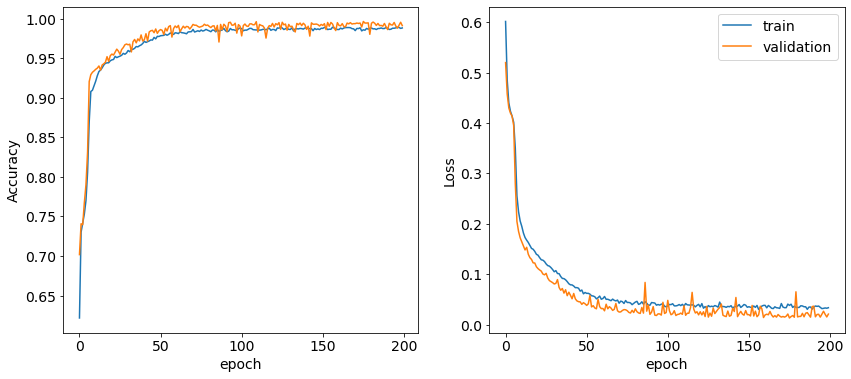

In [19]:
ax = plot_train_loss(fit)

#### show the prediction capabilities of the DNN

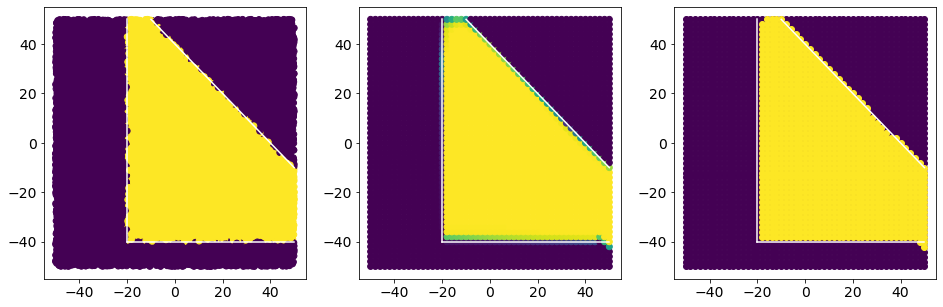

In [20]:
pp = predictions_triangles(x, y, model, Rescale)
if savefigs: plt.savefig('./img/dataset_increased_prediction.pdf')

In [21]:
if dump_env: dill.dump_session('checkpoint_1b.db')

INFO:tensorflow:Assets written to: ram://d859c9a3-9069-474a-a65f-fe21c9cb1bea/assets


### **1C - performance of DNN with augmented number of samples**

data: 4000 > train: 3200 
dim: 2


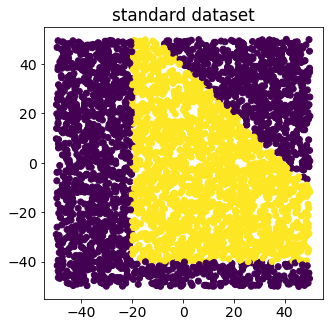

In [22]:
# loading again the std dataset
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x);   L = len(x[0]);
N_train = int(perc_train*N)

print(f'data: {N} > train: {N_train} \ndim: {L}')

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('standard dataset')
if savefigs: plt.savefig('./img/dataset_std.pdf')

In [23]:
# split train and test data
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 3200 	 Validation: 800


#### performing the data augmentation

In [24]:
augment_factor = 30 # data augmentation factor: approximately ((augment_factor-1)*len(x_train)) artificial data will be created
print('Augmentation factor: x', augment_factor)
dim = x_train.shape[1]
print('Dimensionality of the sample data:', dim)

# create a pandas DataFrame containing the training data
x_columns = [f'x{i}' for i in range(1, dim+1)]
df = pd.DataFrame(x_train, columns=x_columns)
df['y'] = y_train.astype(int)
#df

Augmentation factor: x 30
Dimensionality of the sample data: 2


In [25]:
x_augment = np.full((1, dim), np.nan)
y_augment = np.array(np.nan).reshape(1,)
print('x_augment.shape =', x_augment.shape)
print('y_augment.shape =', y_augment.shape)

ranges = np.array(df[x_columns].max()-df[x_columns].min())
mask_rel_size = 1/20 # mask relative size w.r.t. data range along each dimension 
mask_size = mask_rel_size*ranges
print('Data ranges along each dimension:', ranges)
print('Mask size:', mask_size)

n_masks = round((augment_factor-1)/((mask_rel_size)**dim))
print('Number of masks that will be created:', n_masks)

print("\nData augmentation in progress...")
for i in range(n_masks):

    sample = np.array(df[x_columns].sample()).reshape(dim,) # random sample from the DataFrame containing the training data

    mask = True
    for j, xj in enumerate(x_columns):
        mask = mask & ((df[xj] >= (sample[j]-(mask_size[j]/2))) & (df[xj] <= (sample[j]+(mask_size[j]/2))))

    df_masked = df[mask]
    n_zeros = (df_masked['y'] == 0).sum() # number of samples in df_masked with label y = 0
    n_ones = len(df_masked)-n_zeros       # number of samples in df_masked with label y = 1
    most_freq_ratio = max(n_zeros, n_ones)/len(df_masked) # most frequent label ratio
    amplitude = 3*(most_freq_ratio**3)

    dx = amplitude*np.random.uniform(low=-1, high=+1, size=df_masked[x_columns].shape) # vector of random displacements
    x_augment = np.append(x_augment, df_masked[x_columns]+dx, axis=0)
    y_augment = np.append(y_augment, df_masked['y'], axis=0)

    #print(f'Mask #{i} | sample: {sample}, len(df_masked): {len(df_masked)}, most_freq_ratio: {most_freq_ratio}')

print("Done!")

x_augment = x_augment[1:] # drop the initial NaN
y_augment = y_augment[1:] # drop the initial NaN

# create a pandas DataFrame containing the artificial dataset
print('\nCreating a pandas DataFrame containing the artificial dataset...')
df_augment = pd.DataFrame(x_augment, columns=x_columns)
df_augment['y'] = y_augment.astype(int)

x_augment.shape = (1, 2)
y_augment.shape = (1,)
Data ranges along each dimension: [99.84597797 99.98656553]
Mask size: [4.9922989  4.99932828]
Number of masks that will be created: 11600

Data augmentation in progress...
Done!

Creating a pandas DataFrame containing the artificial dataset...


In [26]:
df_augment

x1         x2  y
0        3.681805  42.994430  0
1       -0.257863  43.379775  0
2        1.093185  43.887576  0
3        4.183609  44.082255  0
4        6.559960  45.878479  0
...           ...        ... ..
101890 -24.405767 -30.839909  0
101891 -25.815195 -33.025613  0
101892 -21.665725 -31.686194  0
101893 -26.261437 -30.237803  0
101894 -24.002506 -32.773283  0

[101895 rows x 3 columns]

x_train shape: (105095, 2)
y_train shape: (105095,)


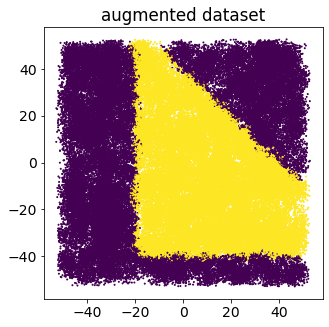

In [27]:
# concatenate the artificial dataset to the training dataset
x_train = np.concatenate((x_train, x_augment), axis=0)
y_train = np.concatenate((y_train, y_augment), axis=0)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

plt.figure(figsize=(5,5))
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=1)
plt.title('augmented dataset')
if savefigs: plt.savefig('./img/dataset_augmented.pdf')

In [28]:
# rescale input data  (uses the function defined in 1A!
x_train = Rescale(x_train);   x_valid = Rescale(x_valid);

#### create & train the model

In [29]:
# use the same model defined in 1A
model = create_model_default(case=1)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
fit = model.fit(x_train, y_train, epochs=50, batch_size=150,
                validation_data=(x_valid, y_valid), verbose=2)

Epoch 1/50
701/701 - 1s - loss: 0.3850 - accuracy: 0.8524 - val_loss: 0.2483 - val_accuracy: 0.9237 - 576ms/epoch - 822us/step
Epoch 2/50
701/701 - 0s - loss: 0.2364 - accuracy: 0.9132 - val_loss: 0.2011 - val_accuracy: 0.9262 - 354ms/epoch - 505us/step
Epoch 3/50
701/701 - 0s - loss: 0.2056 - accuracy: 0.9148 - val_loss: 0.1804 - val_accuracy: 0.9275 - 341ms/epoch - 486us/step
Epoch 4/50
701/701 - 0s - loss: 0.1914 - accuracy: 0.9153 - val_loss: 0.1693 - val_accuracy: 0.9237 - 305ms/epoch - 435us/step
Epoch 5/50
701/701 - 0s - loss: 0.1848 - accuracy: 0.9160 - val_loss: 0.1646 - val_accuracy: 0.9262 - 310ms/epoch - 442us/step
Epoch 6/50
701/701 - 0s - loss: 0.1825 - accuracy: 0.9164 - val_loss: 0.1634 - val_accuracy: 0.9225 - 324ms/epoch - 463us/step
Epoch 7/50
701/701 - 0s - loss: 0.1815 - accuracy: 0.9163 - val_loss: 0.1621 - val_accuracy: 0.9225 - 350ms/epoch - 499us/step
Epoch 8/50
701/701 - 0s - loss: 0.1810 - accuracy: 0.9163 - val_loss: 0.1572 - val_accuracy: 0.9287 - 351ms/epo

#### show the results of the default model

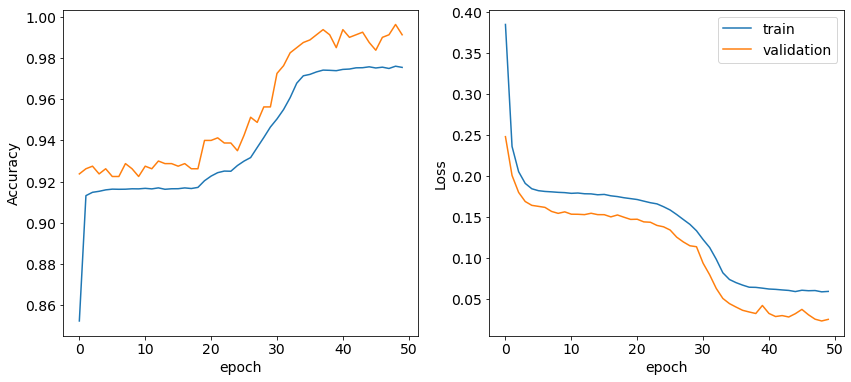

In [32]:
ax = plot_train_loss(fit)

#### show the prediction capabilities of the DNN

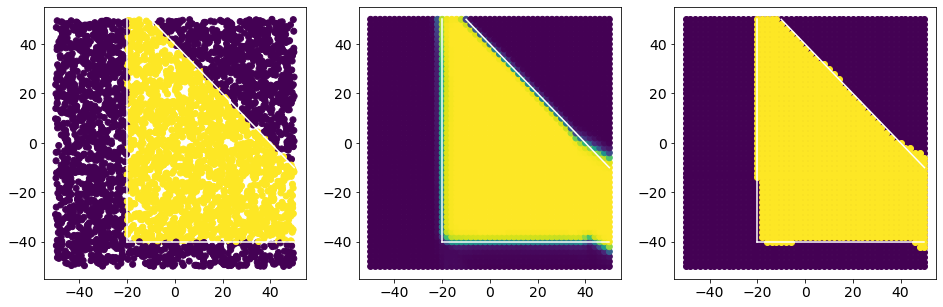

In [33]:
pp = predictions_triangles(x, y, model, Rescale)
if savefigs: plt.savefig('./img/dataset_augmented_prediction.pdf')

#### **How does the performance of the DNN change with the augmentation?**

Running multiple times the previous section, with different augmentation factors, one may get the following results:

| Augmentation factor | Training loss | Training accuracy | Validation loss | Validation accuracy |
| :-: | :-: | :-: | :-: | :-: |
| 1 (no augmentation) | 0.1630 | 0.9278 | 0.1558 | 0.9262 |
| 2                   | 0.0346 | 0.9857 | 0.0170 | 0.9962 |
| 3                   | 0.0453 | 0.9826 | 0.0196 | 0.9937 |
| 10                  | 0.0596 | 0.9749 | 0.0253 | 0.9912 |
| 20                  | 0.0631 | 0.9740 | 0.0280 | 0.9937 |
| 30                  | 0.0562 | 0.9768 | 0.0211 | 0.9962 |
| 100                 | 0.0513 | 0.9788 | 0.0186 | 0.9950 |

In [34]:
if dump_env: dill.dump_session('checkpoint_1c.db')

INFO:tensorflow:Assets written to: ram://3b84f14f-d9ba-4648-9b38-2817878cf7ee/assets


## **2** - gridsearch for the DNN configuration

In [35]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import keras,sklearn
from keras import layers

data: 4000 > train: 3200 
dim: 2


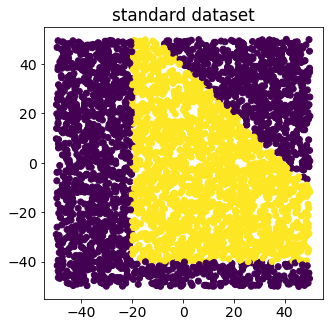

In [36]:
# reload again the standard dataset
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x);   L = len(x[0]);
N_train = int(perc_train*N)

print(f'data: {N} > train: {N_train} \ndim: {L}')

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('standard dataset')
plt.show()

In [37]:
# split train and test data
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 3200 	 Validation: 800


In [38]:
x_train = Rescale(x_train);  x_valid = Rescale(x_valid);

### **first extensive gridsearch**

At first, we executed a huge gridsearch. The range of parameters we span takes all the possible combinations among the following lists of parameters:
```python
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nepoch = 200
kfold_cross_validation = 4
```
**Warning: this gridsearch takes a lot of time, even on powerful computers.**

In [39]:
def create_DNN_GridSearch(activation, dropout_rate, layers):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation))
    for i in range(len(layers)):
        model.add(Dense(layers[i],activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model
    
def compile_model(optimizer="Adam", activation = "relu", dropout_rate = 0.2, layers = (20, 20)):
    # create the mode
    model=create_DNN_GridSearch(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    return model

In [40]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=grid_search_threads, cv=4 )
grid_result = grid.fit(x_train,y_train, epochs=200, batch_size = 50, shuffle = True,verbose=False)# epochs and batch sizes have to be increased, but we need a powerful computer

25/25 [==============================] - 0s 303us/step - loss: 0.6304 - accuracy: 0.6263


In [41]:
# summarize results
print("best %f%% using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
grid_results_sorted = sorted(zip(means, stds, params), key=lambda x: x[0], reverse=True)

print('\n======= all results ======')
for mean, stdev, param in grid_results_sorted: #sorted( grid_results_sorted , key=lambda x: x[2]['optimizer'], reverse=True):
    print("%f (+-%f) with: %r" % (mean, stdev, param))

best 0.985625% using {'activation': 'relu', 'dropout_rate': 0.1, 'optimizer': 'Nadam'}

======= all results ======
0.985625 (+-0.003802) with: {'activation': 'relu', 'dropout_rate': 0.1, 'optimizer': 'Nadam'}
0.978750 (+-0.010496) with: {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam'}
0.974688 (+-0.005182) with: {'activation': 'tanh', 'dropout_rate': 0.1, 'optimizer': 'RMSprop'}
0.974688 (+-0.013328) with: {'activation': 'tanh', 'dropout_rate': 0.0, 'optimizer': 'Adam'}
0.972187 (+-0.007255) with: {'activation': 'softsign', 'dropout_rate': 0.0, 'optimizer': 'Nadam'}
0.969687 (+-0.005546) with: {'activation': 'softsign', 'dropout_rate': 0.1, 'optimizer': 'Nadam'}
0.965625 (+-0.004193) with: {'activation': 'softplus', 'dropout_rate': 0.1, 'optimizer': 'Nadam'}
0.965000 (+-0.028655) with: {'activation': 'relu', 'dropout_rate': 0.0, 'optimizer': 'Adamax'}
0.964688 (+-0.013210) with: {'activation': 'tanh', 'dropout_rate': 0.1, 'optimizer': 'Adam'}
0.961250 (+-0.011891) 

#### best model re-training

In [42]:
chosen_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam'} # paste here the model to use

model = compile_model(**chosen_params, layers = (20, 20))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
fit = model.fit(x_train, y_train,
                epochs = 400, batch_size = 50,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/400
64/64 - 0s - loss: 0.6882 - accuracy: 0.5362 - val_loss: 0.6789 - val_accuracy: 0.5750 - 236ms/epoch - 4ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6856 - accuracy: 0.5362 - val_loss: 0.6825 - val_accuracy: 0.5288 - 36ms/epoch - 563us/step
Epoch 3/400
64/64 - 0s - loss: 0.6795 - accuracy: 0.5425 - val_loss: 0.6691 - val_accuracy: 0.5750 - 40ms/epoch - 630us/step
Epoch 4/400
64/64 - 0s - loss: 0.6733 - accuracy: 0.5431 - val_loss: 0.6601 - val_accuracy: 0.5750 - 47ms/epoch - 730us/step
Epoch 5/400
64/64 - 0s - loss: 0.6582 - accuracy: 0.5631 - val_loss: 0.6492 - val_accuracy: 0.5512 - 44ms/epoch - 690us/step
Epoch 6/400
64/64 - 0s - loss: 0.6428 - accuracy: 0.5919 - val_loss: 0.6399 - val_accuracy: 0.5650 - 47ms/epoch - 741us/step
Epoch 7/400
64/64 - 0s - loss: 0.6299 - accuracy: 0.5994 - val_loss: 0.6410 - val_accuracy: 0.6012 - 49ms/epoch - 761us/step
Epoch 8/400
64/64 - 0s - loss: 0.6218 - accuracy: 0.6166 - val_loss: 0.6287 - val_accuracy: 0.5763 - 40ms/epoch - 626us/step
E

#### show the results of the optimal model

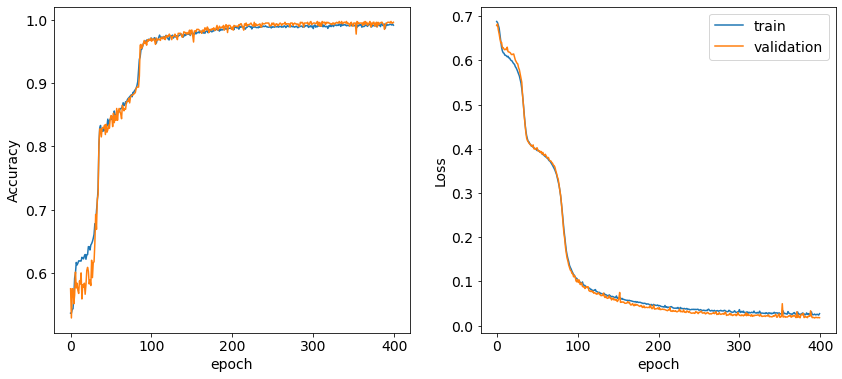

In [43]:
%run triangle_code.py
ax = plot_train_loss(fit)
if savefigs: plt.savefig('./img/best_model_gridsearch_params_error.pdf')

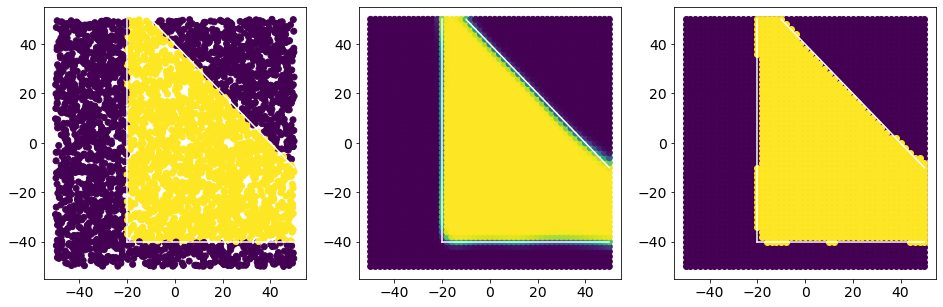

In [44]:
pp = predictions_triangles(x, y, model, Rescale)
if savefigs: plt.savefig('./img/best_model_gridsearch_params_prediction.pdf')

In [45]:
if dump_env: dill.dump_session('checkpoint_2a.db')

INFO:tensorflow:Assets written to: ram://96f298a7-a980-4994-8ef8-36df9c38d87d/assets
INFO:tensorflow:Assets written to: ram://90b949fa-fa19-4665-a792-05f4605b1ca3/assets


### **gridsearch for DNN shape** (layer configuration)

**Warning: this gridsearch takes a lot of time, even on powerful computers.**

In [46]:
def create_DNN_GridSearch(activation, dropout_rate, layers_s, layers_q):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation))
    for i in range(layers_q):
        model.add(Dense(layers_s,activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model
    
def compile_model(optimizer="Adam", activation = "relu", dropout_rate = 0.2, layers_s = 20, layers_q = 2)  :
    # create the mode
    model=create_DNN_GridSearch(activation, dropout_rate, layers_s, layers_q)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    return model

In [47]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['RMSprop','Adam',]
activation = ['softplus', 'softsign', 'tanh']
dropout_rate = [0.0, 0.1, 0.2]
layer_size = [1,10,20,30,40,50]
layer_qnt = [1, 2,3,4,5,6]

# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate, layers_s=layer_size, layers_q = layer_qnt)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=grid_search_threads, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=200, batch_size = 50, shuffle = True,verbose=False)

/tmp/ipykernel_1334416/1821018935.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model_gridsearch = KerasClassifier(build_fn = compile_model)


25/25 [==============================] - 0s 361us/step - loss: 0.0420 - accuracy: 0.9837


In [48]:
# summarize results
print("best %f%% using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
grid_results_sorted = sorted(zip(means, stds, params), key=lambda x: x[0], reverse=True)

print('\n======= all results ======')
for mean, stdev, param in grid_results_sorted: #sorted( grid_results_sorted , key=lambda x: x[2]['optimizer'], reverse=True):
    print("%f (+-%f) with: %r" % (mean, stdev, param))

best 0.991563% using {'activation': 'tanh', 'dropout_rate': 0.2, 'layers_q': 5, 'layers_s': 10, 'optimizer': 'Adam'}

======= all results ======
0.991563 (+-0.004452) with: {'activation': 'tanh', 'dropout_rate': 0.2, 'layers_q': 5, 'layers_s': 10, 'optimizer': 'Adam'}
0.991250 (+-0.004593) with: {'activation': 'tanh', 'dropout_rate': 0.0, 'layers_q': 3, 'layers_s': 40, 'optimizer': 'Adam'}
0.990625 (+-0.003248) with: {'activation': 'softsign', 'dropout_rate': 0.0, 'layers_q': 3, 'layers_s': 50, 'optimizer': 'Adam'}
0.990625 (+-0.005962) with: {'activation': 'softsign', 'dropout_rate': 0.1, 'layers_q': 6, 'layers_s': 40, 'optimizer': 'Adam'}
0.990625 (+-0.003248) with: {'activation': 'softsign', 'dropout_rate': 0.2, 'layers_q': 6, 'layers_s': 50, 'optimizer': 'Adam'}
0.990625 (+-0.001875) with: {'activation': 'softsign', 'dropout_rate': 0.1, 'layers_q': 4, 'layers_s': 50, 'optimizer': 'RMSprop'}
0.990313 (+-0.003109) with: {'activation': 'tanh', 'dropout_rate': 0.1, 'layers_q': 6, 'laye

In [49]:
grid_results_sorted_layers_q = sorted( grid_results_sorted , key=lambda x: x[2]['layers_q'], reverse=True)

for mean, stdev, param in grid_results_sorted_layers_q: #sorted( grid_results_sorted , key=lambda x: x[2]['optimizer'], reverse=True):
    print("%f (+-%f) with: %r" % (mean, stdev, param))

0.990625 (+-0.005962) with: {'activation': 'softsign', 'dropout_rate': 0.1, 'layers_q': 6, 'layers_s': 40, 'optimizer': 'Adam'}
0.990625 (+-0.003248) with: {'activation': 'softsign', 'dropout_rate': 0.2, 'layers_q': 6, 'layers_s': 50, 'optimizer': 'Adam'}
0.990313 (+-0.003109) with: {'activation': 'tanh', 'dropout_rate': 0.1, 'layers_q': 6, 'layers_s': 10, 'optimizer': 'Adam'}
0.987500 (+-0.003423) with: {'activation': 'softsign', 'dropout_rate': 0.0, 'layers_q': 6, 'layers_s': 20, 'optimizer': 'Adam'}
0.987500 (+-0.004760) with: {'activation': 'tanh', 'dropout_rate': 0.2, 'layers_q': 6, 'layers_s': 10, 'optimizer': 'Adam'}
0.986875 (+-0.006281) with: {'activation': 'tanh', 'dropout_rate': 0.2, 'layers_q': 6, 'layers_s': 40, 'optimizer': 'Adam'}
0.986250 (+-0.004921) with: {'activation': 'tanh', 'dropout_rate': 0.0, 'layers_q': 6, 'layers_s': 10, 'optimizer': 'Adam'}
0.985937 (+-0.007415) with: {'activation': 'softsign', 'dropout_rate': 0.2, 'layers_q': 6, 'layers_s': 10, 'optimizer': 

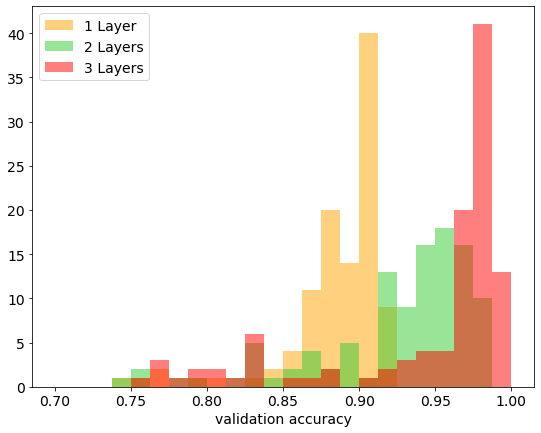

In [50]:
layerscores = [[] for i in range(len(layer_qnt))]

for i in range(len(layer_qnt)):
    layerscores[i] = list(list(zip(*[d for d in grid_results_sorted if d[2]['layers_q']==layer_qnt[i]]))[0])

data1 = np.array(layerscores[0])
data2 = np.array(layerscores[1])
data3 = np.array(layerscores[2])
data4 = np.array(layerscores[3])
data5 = np.array(layerscores[4])
data6 = np.array(layerscores[5])

fig, ax = plt.subplots()
fig.set_size_inches(9, 7)
bins = np.linspace(0.7, 1, 25)   # TOCHECK
ax.hist(data1, bins=bins, color='orange', label='1 Layer',
        alpha=0.5, histtype='stepfilled')
ax.hist(data2, bins=bins, color='limegreen', label='2 Layers',
        alpha=0.5, histtype='stepfilled')
ax.hist(data3, bins=bins, color='r', label='3 Layers',
        alpha=0.5, histtype='stepfilled')
#ax.hist(data4, bins=bins, color='cyan', label='4 Layers',
#       alpha=0.5, histtype='stepfilled')
#ax.hist(data5, bins=bins, color='brown', label='5 Layers',
#        alpha=0.5, histtype='stepfilled')
#ax.hist(data6, bins=bins, color='yellow', label='6 Layers',
#        alpha=0.5, histtype='stepfilled')

ax.set_xlabel('validation accuracy')
##This lines indicate the means
#ax.axvline(data1.mean(), color='blue', linewidth=2)
#ax.axvline(data2.mean(), color='green', linewidth=2)
#ax.axvline(data3.mean(), color='red', linewidth=2)
#ax.axvline(data4.mean(), color='cyan', linewidth=2)
#ax.axvline(data5.mean(), color='brown', linewidth=2)
#ax.axvline(data6.mean(), color='yellow', linewidth=2)

ax.legend(loc='upper left')
ax.margins(0.05)
if savefigs: plt.savefig('./img/hist_layers_1.pdf')

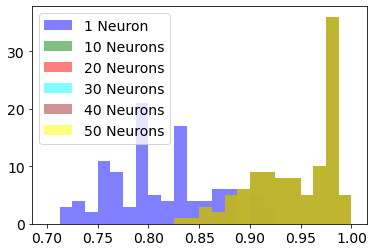

In [51]:
layerscores = [[] for i in range(len(layer_size))]

for i in range(len(layer_qnt)):
    layerscores[i] = list(list(zip(*[d for d in grid_results_sorted if d[2]['layers_s']==layer_size[i]]))[0])

data1 = np.array(layerscores[0])
data2 = np.array(layerscores[1])
data3 = np.array(layerscores[1])
data4 = np.array(layerscores[1])
data5 = np.array(layerscores[1])
data6 = np.array(layerscores[1])

fig, ax = plt.subplots()

bins = np.linspace(0.7, 1, 25)
ax.hist(data1, bins=bins, color='blue', label='1 Neuron',
        alpha=0.5, histtype='stepfilled')
ax.hist(data2, bins=bins, color='green', label='10 Neurons',
        alpha=0.5, histtype='stepfilled')
ax.hist(data3, bins=bins, color='red', label='20 Neurons',
        alpha=0.5, histtype='stepfilled')
ax.hist(data4, bins=bins, color='cyan', label='30 Neurons',
        alpha=0.5, histtype='stepfilled')
ax.hist(data5, bins=bins, color='brown', label='40 Neurons',
        alpha=0.5, histtype='stepfilled')
ax.hist(data6, bins=bins, color='yellow', label='50 Neurons',
        alpha=0.5, histtype='stepfilled')

##This lines indicate the means
#ax.axvline(data1.mean(), color='blue', linewidth=2)
#ax.axvline(data2.mean(), color='green', linewidth=2)
#ax.axvline(data3.mean(), color='red', linewidth=2)
#ax.axvline(data4.mean(), color='cyan', linewidth=2)
#ax.axvline(data5.mean(), color='brown', linewidth=2)
#ax.axvline(data6.mean(), color='yellow', linewidth=2)

ax.legend(loc='upper left')
ax.margins(0.05)
if savefigs: plt.savefig('./img/hist_layers_2.pdf')

In [52]:
if dump_env: dill.dump_session('checkpoint_2b.db')

### best model re-training

In [53]:
chosen_params = {'activation': 'tanh', 'dropout_rate': 0.0, 'layers_q': 4, 'layers_s': 10, 'optimizer': 'Adam'} # paste here the model to use

model = compile_model(**chosen_params)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
fit = model.fit(x_train, y_train,
                epochs = 400, batch_size = 50,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/400
64/64 - 0s - loss: 0.6604 - accuracy: 0.6134 - val_loss: 0.6354 - val_accuracy: 0.6062 - 296ms/epoch - 5ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6115 - accuracy: 0.6438 - val_loss: 0.6177 - val_accuracy: 0.6225 - 42ms/epoch - 652us/step
Epoch 3/400
64/64 - 0s - loss: 0.5815 - accuracy: 0.6603 - val_loss: 0.5839 - val_accuracy: 0.6637 - 34ms/epoch - 536us/step
Epoch 4/400
64/64 - 0s - loss: 0.5428 - accuracy: 0.7066 - val_loss: 0.5409 - val_accuracy: 0.7013 - 37ms/epoch - 582us/step
Epoch 5/400
64/64 - 0s - loss: 0.4939 - accuracy: 0.7706 - val_loss: 0.4855 - val_accuracy: 0.7837 - 34ms/epoch - 528us/step
Epoch 6/400
64/64 - 0s - loss: 0.4399 - accuracy: 0.8434 - val_loss: 0.4227 - val_accuracy: 0.8500 - 41ms/epoch - 634us/step
Epoch 7/400
64/64 - 0s - loss: 0.3847 - accuracy: 0.8734 - val_loss: 0.3745 - val_accuracy: 0.8625 - 43ms/epoch - 671us/step
Epoch 8/400
64/64 - 0s - loss: 0.3475 - accuracy: 0.8778 - val_loss: 0.3348 - val_accuracy: 0.8725 - 36ms/epoch - 568us/step
E

#### show the results of the optimal model

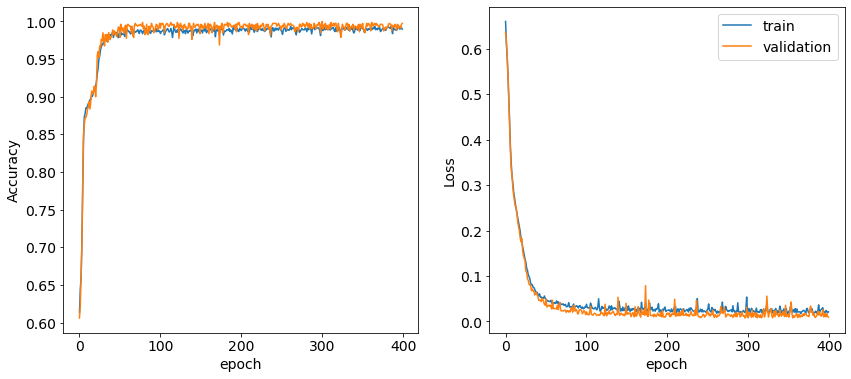

In [54]:
%run triangle_code.py
ax = plot_train_loss(fit)
if savefigs: plt.savefig('./img/best_model_gridsearch_layers_error.pdf')

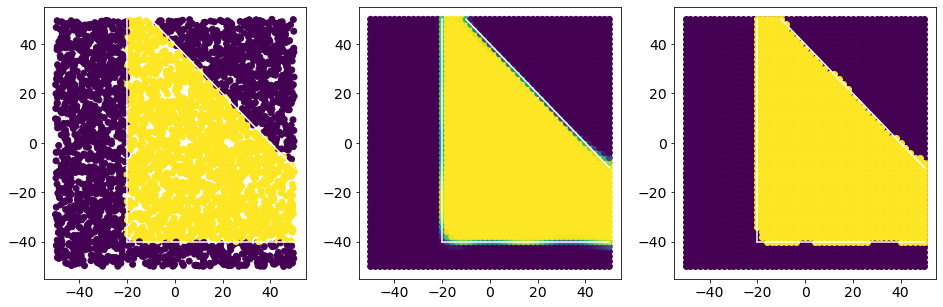

In [55]:
pp = predictions_triangles(x, y, model, Rescale)
if savefigs: plt.savefig('./img/best_model_gridsearch_layers_prediction.pdf')

## **3** - check if rescaling or different initializations impact on the performance of the DNN

data: 4000 > train: 3200 
dim: 2


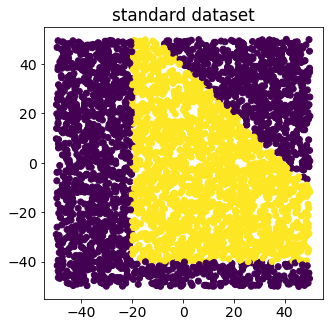

In [56]:
# reload again the standard dataset
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x);   L = len(x[0]);
N_train = int(perc_train*N)

print(f'data: {N} > train: {N_train} \ndim: {L}')

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('standard dataset')
plt.show()

In [57]:
# split train and test data
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 3200 	 Validation: 800


In [58]:
# create backup copies before rescaling!
x_train_backup = np.copy(x_train);    x_valid_backup = np.copy(x_valid);

### change the **data rescaling**

In [59]:
rescaler_keywords = [ 'no', 'generic', 'std', 'stabilized', 'minmax_01', 'minmax_11' ]

def new_Rescale(x, rescaler = 'no', epsilon = 100):
    if rescaler == 'generic':        # suggested rescaling
        return x/50
    elif rescaler == 'std':          # standardization
        return (x-x.mean())/np.sqrt(x.var())
    elif rescaler == 'stabilized':   # standardization with stabilization factor
        #epsilon = 100       # take epsilon from arg!
        return (x-x.mean())/np.sqrt(x.var()+epsilon)
    elif rescaler == 'minmax_01':   # min-max normalization in [0,1]
        l = 0;      u = 1;   # lower & upper value for normalization
        return (((x-x.min())/(x.max()-x.min()))*(u-l))+l
    elif rescaler == 'minmax_11':   # min-max normalization in [-1,1]
        l = -1;     u = 1;
        return (((x-x.min())/(x.max()-x.min()))*(u-l))+l
    elif rescaler == 'no':
        return x                    # no rescaling
    else:
        print("Rescaler not recognized, I will not rescale data!")
        return x

In [60]:
# restore backup copies... useful if you want to run again this section of the notebook without applying multiple rescaling!
x_train = np.copy(x_train_backup);  x_valid = np.copy(x_valid_backup);

x_train = new_Rescale(x_train, rescaler = 'stabilized')
x_valid = new_Rescale(x_valid, rescaler = 'stabilized')

#### create & train the model

In [61]:
# use the same model defined in 1A
model = create_model_default(case=1)
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 2)                 6         
                                                                 
 dense_34 (Dense)            (None, 20)                60        
                                                                 
 dense_35 (Dense)            (None, 20)                420       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [63]:
fit = model.fit(x_train, y_train, epochs=nepoch, batch_size=50,
                validation_data=(x_valid, y_valid), verbose=2)

Epoch 1/400
64/64 - 0s - loss: 0.6797 - accuracy: 0.5719 - val_loss: 0.6624 - val_accuracy: 0.6525 - 242ms/epoch - 4ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6611 - accuracy: 0.6562 - val_loss: 0.6387 - val_accuracy: 0.6938 - 42ms/epoch - 652us/step
Epoch 3/400
64/64 - 0s - loss: 0.6327 - accuracy: 0.7106 - val_loss: 0.6110 - val_accuracy: 0.7025 - 40ms/epoch - 623us/step
Epoch 4/400
64/64 - 0s - loss: 0.6077 - accuracy: 0.7269 - val_loss: 0.5930 - val_accuracy: 0.7125 - 39ms/epoch - 610us/step
Epoch 5/400
64/64 - 0s - loss: 0.5909 - accuracy: 0.7412 - val_loss: 0.5742 - val_accuracy: 0.7337 - 36ms/epoch - 568us/step
Epoch 6/400
64/64 - 0s - loss: 0.5660 - accuracy: 0.7631 - val_loss: 0.5562 - val_accuracy: 0.7475 - 42ms/epoch - 651us/step
Epoch 7/400
64/64 - 0s - loss: 0.5407 - accuracy: 0.7816 - val_loss: 0.5290 - val_accuracy: 0.7738 - 37ms/epoch - 583us/step
Epoch 8/400
64/64 - 0s - loss: 0.5161 - accuracy: 0.7997 - val_loss: 0.4994 - val_accuracy: 0.8037 - 40ms/epoch - 627us/step
E

#### **data scaling results**

| Method | Training loss | Training accuracy | Validation loss | Validation accuracy |
| :-: | :-: | :-: | :-: | :-: |
| no rescaling                                               | 0.1725 | 0.9231 | 0.1547 | 0.9287 |
| generic rescaling $(x/50)$                                 | 0.1489 | 0.9337 | 0.1418 | 0.9413 |
| standardization                                            | 0.1611 | 0.9262 | 0.1550 | 0.9262 |
| standardization with stabilization factor $\epsilon = 0.01$| 0.1763 | 0.9219 | 0.1655 | 0.9237 |
| standardization with stabilization factor $\epsilon = 0.1$ | 0.1581 | 0.9241 | 0.1666 | 0.9187 |
| standardization with stabilization factor $\epsilon = 1$   | 0.0955 | 0.9578 | 0.0982 | 0.9588 |
| standardization with stabilization factor $\epsilon = 10$  | 0.0581 | 0.9825 | 0.0674 | 0.9712 |
| standardization with stabilization factor $\epsilon = 100$ | 0.0231 | 0.9919 | 0.0138 | 0.9950 |
| standardization with stabilization factor $\epsilon = 1000$| 0.1525 | 0.9266 | 0.1475 | 0.9250 |
| min-max normalization $[0, 1]$                             | 0.0222 | 0.9909 | 0.0132 | 0.9962 |
| min-max normalization $[-1, 1]$                            | 0.1903 | 0.9266 | 0.1790 | 0.9275 |

### change the **weight initialization**

In [64]:
# restoring the unscaled data
x_train = np.copy(x_train_backup);  x_valid = np.copy(x_valid_backup);
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [65]:
initializers = {0 :None,
                1 :'random_normal',
                2 :'random_uniform',
                3 :'truncated_normal',
                4 :'zeros',
                5 :'ones',
                6 :'glorot_normal',
                7 :'glorot_uniform',   # default on Keras!
                8 :'he_normal',
                9 :'he_uniform',
                10:'identity',
                11:'orthogonal',
                12:'constant',
                13:'variance_scaling'}

init = initializers[13]

CASE = 1

if CASE == 1:
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation='relu', kernel_initializer=init))
    model.add(Dense(20, activation='relu', kernel_initializer=init))
    model.add(Dense(20, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
    nepoch = 400
if CASE == 2:
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation='sigmoid', kernel_initializer=init))
    model.add(Dense(3, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
    nepoch = 400

#print(model.summary())

In [66]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=100,
                validation_data=(x_valid, y_valid),
                verbose=2)

Epoch 1/400
32/32 - 0s - loss: 0.6776 - accuracy: 0.5059 - val_loss: 0.6678 - val_accuracy: 0.5750 - 234ms/epoch - 7ms/step
Epoch 2/400
32/32 - 0s - loss: 0.6618 - accuracy: 0.5369 - val_loss: 0.6517 - val_accuracy: 0.5275 - 27ms/epoch - 834us/step
Epoch 3/400
32/32 - 0s - loss: 0.6421 - accuracy: 0.5894 - val_loss: 0.6309 - val_accuracy: 0.5962 - 26ms/epoch - 821us/step
Epoch 4/400
32/32 - 0s - loss: 0.6159 - accuracy: 0.6472 - val_loss: 0.6060 - val_accuracy: 0.6400 - 26ms/epoch - 803us/step
Epoch 5/400
32/32 - 0s - loss: 0.5866 - accuracy: 0.6747 - val_loss: 0.5803 - val_accuracy: 0.6513 - 23ms/epoch - 711us/step
Epoch 6/400
32/32 - 0s - loss: 0.5561 - accuracy: 0.6963 - val_loss: 0.5557 - val_accuracy: 0.6612 - 25ms/epoch - 768us/step
Epoch 7/400
32/32 - 0s - loss: 0.5324 - accuracy: 0.7088 - val_loss: 0.5349 - val_accuracy: 0.6775 - 23ms/epoch - 714us/step
Epoch 8/400
32/32 - 0s - loss: 0.5114 - accuracy: 0.7262 - val_loss: 0.5168 - val_accuracy: 0.6900 - 30ms/epoch - 929us/step
E

#### **weight initialization results**

| Initializer | Training loss | Training accuracy | Validation loss | Validation accuracy |
| :-: | :-: | :-: | :-: | :-: |
| None             | 0.1303 | 0.9488 | 0.1037 | 0.9638 |
| random_normal    | 0.0488 | 0.9825 | 0.0347 | 0.9887 |
| random_uniform   | 0.1616 | 0.9241 | 0.1400 | 0.9275 |
| truncated_normal | 0.0547 | 0.9809 | 0.0407 | 0.9887 |
| zeros            | 0.6904 | 0.5375 | 0.6846 | 0.5750 |
| ones             | 0.6904 | 0.5375 | 0.6933 | 0.5738 |
| glorot_normal    | 0.0507 | 0.9847 | 0.0423 | 0.9887 |
| glorot_uniform (Keras default)   | 0.1641 | 0.9262 | 0.1553 | 0.9287 |
| he_normal        | 0.1594 | 0.9272 | 0.1437 | 0.9312 |
| he_uniform       | 0.2141 | 0.9247 | 0.1977 | 0.9287 |
| identity         | 0.2884 | 0.8541 | 0.1810 | 0.9350 |
| orthogonal       | 0.0358 | 0.9862 | 0.0216 | 0.9912 |
| constant         | 0.6903 | 0.5375 | 0.6848 | 0.5750 |
| variance_scaling | 0.0306 | 0.9875 | 0.0105 | 0.9987 |

In [68]:
if dump_env: dill.dump_session('checkpoint_3.db')

INFO:tensorflow:Assets written to: ram://f39e011f-1448-426c-952e-c2b1d3d98da0/assets
INFO:tensorflow:Assets written to: ram://9cbd8ddb-8351-4b41-ad7a-fd4764e25e9b/assets


## **training the best model**

In [69]:
# restoring the unscaled data
x_train = np.copy(x_train_backup);  x_valid = np.copy(x_valid_backup);
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [70]:
init = 'glorot_normal'

CASE = 1

if CASE == 1:
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation='relu', kernel_initializer=init))
    model.add(Dense(20, activation='relu', kernel_initializer=init))
    model.add(Dense(20, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
if CASE == 2:
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation='sigmoid', kernel_initializer=init))
    model.add(Dense(3, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 20)                60        
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
# reinstantiate the functions to train again the model
def create_DNN_GridSearch(activation, dropout_rate, layers, init):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation, kernel_initializer=init))
    for i in range(len(layers)):
        model.add(Dense(layers[i],activation = activation, kernel_initializer=init))
    if dropout_rate != 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model
    
def compile_model(optimizer="Adam", activation = "relu", dropout_rate = 0.1, layers = (20, 20), init = 'glorot_uniform' ):
    # create the mode
    model=create_DNN_GridSearch(activation, dropout_rate, layers, init)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    return model

In [72]:
best_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam', 'init' : 'glorot_normal'}  # paste here the model to use

model = compile_model(**best_params, layers = (20, 20))
model.compile(loss='binary_crossentropy', optimizer=best_params['optimizer'],metrics=['accuracy'])
fit = model.fit(x_train, y_train, epochs = 400, batch_size = 50,
                validation_data = (x_valid, y_valid), verbose = 2)

Epoch 1/400
64/64 - 0s - loss: 0.7001 - accuracy: 0.5156 - val_loss: 0.6880 - val_accuracy: 0.5750 - 378ms/epoch - 6ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6941 - accuracy: 0.5316 - val_loss: 0.6915 - val_accuracy: 0.5275 - 38ms/epoch - 590us/step
Epoch 3/400
64/64 - 0s - loss: 0.6922 - accuracy: 0.5188 - val_loss: 0.6836 - val_accuracy: 0.5750 - 36ms/epoch - 558us/step
Epoch 4/400
64/64 - 0s - loss: 0.6908 - accuracy: 0.5297 - val_loss: 0.6829 - val_accuracy: 0.5750 - 34ms/epoch - 528us/step
Epoch 5/400
64/64 - 0s - loss: 0.6873 - accuracy: 0.5147 - val_loss: 0.6789 - val_accuracy: 0.5750 - 34ms/epoch - 525us/step
Epoch 6/400
64/64 - 0s - loss: 0.6808 - accuracy: 0.5003 - val_loss: 0.6725 - val_accuracy: 0.5312 - 39ms/epoch - 610us/step
Epoch 7/400
64/64 - 0s - loss: 0.6682 - accuracy: 0.5172 - val_loss: 0.6626 - val_accuracy: 0.5263 - 35ms/epoch - 539us/step
Epoch 8/400
64/64 - 0s - loss: 0.6500 - accuracy: 0.5412 - val_loss: 0.6417 - val_accuracy: 0.5125 - 34ms/epoch - 538us/step
E

#### show the results of the best model

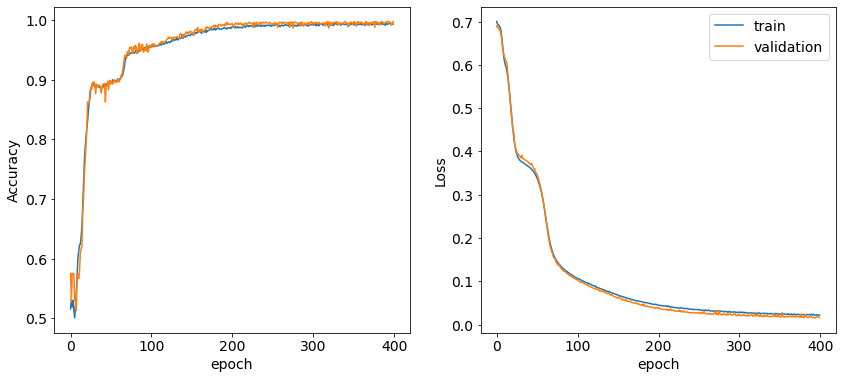

In [73]:
ax = plot_train_loss(fit)
if savefigs: plt.savefig('./img/best_model_loss.pdf')

#### show the prediction capabilities of the best DNN

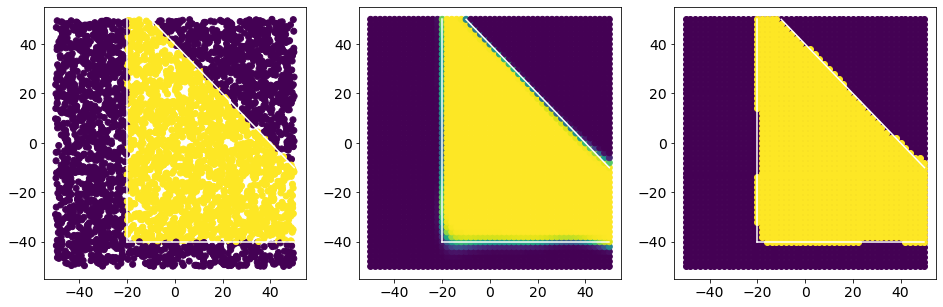

In [74]:
pp = predictions_triangles(x, y, model, Rescale)
if savefigs: plt.savefig('./img/best_model_prediction.pdf')

In [75]:
if dump_env: dill.dump_session('checkpoint_3bis.db')

INFO:tensorflow:Assets written to: ram://8624ad22-d59e-4fac-88c4-82cfa181acf7/assets
INFO:tensorflow:Assets written to: ram://e38c3b73-ac33-444e-9e11-11f695a074d4/assets


## **4** - testing other non-linear functions

The parameters to fix are:

-n: the number of dimensions required (it is fixed to two for the 2 functions given by Baiesi).

-N: the number of points to generate

-B: the size of the n-dimensional cubic space we will consider

-TYPE: the function index (1=triangle, 2=2nd function of Baiesi, 3=n-sphere, 4=Hollow n-sphere, 5=5 different N spheres together, 6=n-dim polyhedron, 7=Hollow n-dim polyhedron, 8=5 different n-dim polyhedrons together, 9=sinusoidal separating surface, 10=n-dim chessboard, 11=n-dim chessboard intersecating an n-dim hollow elissoid)

The plots only works for 2D.

The last cell is ready to save file in the correct filename in the DATA folder.

In [5]:
## parameters for data generation

# number of samples
N = 20000
# dimensionality of the box (2 is 2D)
n = 2
# size of each sample (equal to the dimensionality)
L = n
# box size (along each dimension) (centered on the origin)
B = 100

# import the functions
%run nonlinear_functions_others.py

print_available_functions()

f_index(1, np.array([20,30]), n = 2 )

--- available functions ---
triangle
baiesi_second
N_sphere
hollow_N_sphere
multi_sphere
polyhedron
hollow_polyhedron
multi_polyhedron
sine_surface
chessboard
mixed_chessboard


1

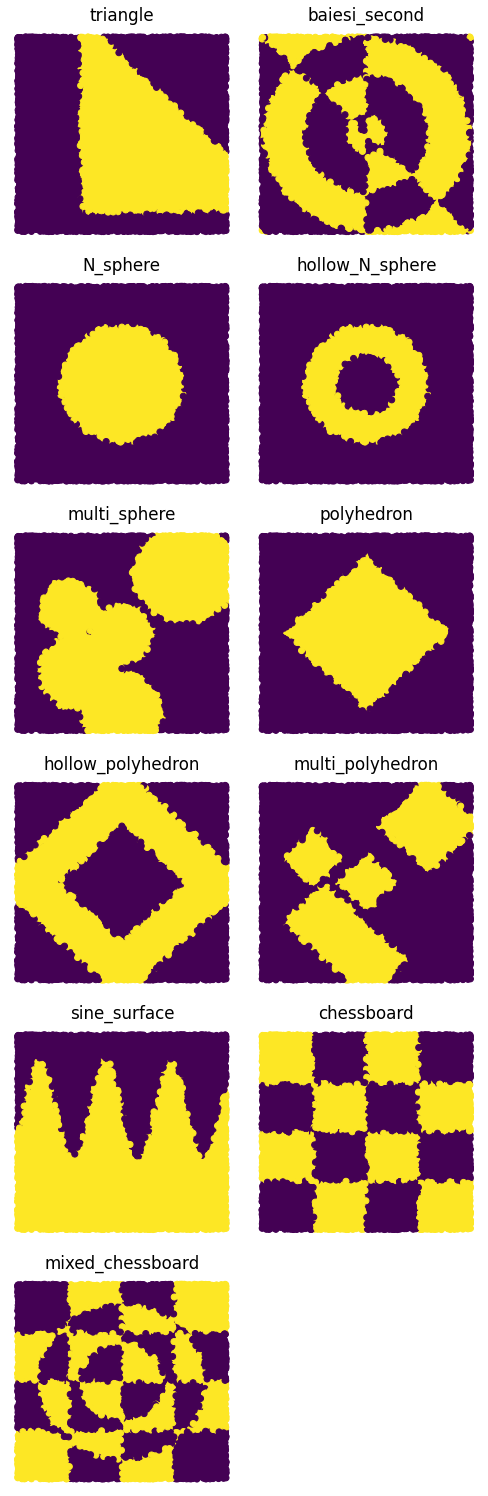

In [78]:
x = (np.random.random((N,n))-0.5)*B
y = np.zeros(N)

nrows = 6;  ncols = 2;  base_figsize = 3.5;
if len(available_functions) > nrows*ncols:  print("ERROR: grid is too small to plot all the functions")
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(base_figsize*ncols, base_figsize*nrows))

for i, (f, fn) in enumerate(zip(available_functions, available_functions_names)):        
    ax = axes[ int(i/ncols) , i%ncols]
    for i in range(N):  y[i] = f(x[i], n=2)  # compute the predictions for current function
    ax.scatter(x[:,0], x[:,1], c=y)
    ax.title.set_text(fn)
    ax.axis('off')

for i in range( len(available_functions), nrows*ncols): # remove the empty subplots
    fig.delaxes(axes[ int(i/ncols) , i%ncols])
    
plt.tight_layout()
if savefigs: plt.savefig('./img/other_functions.pdf')

### fit a complex function

you selected baiesi_second


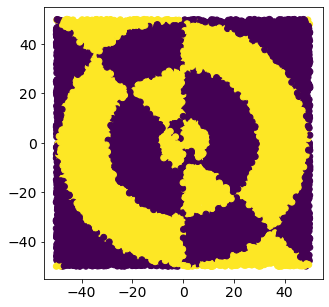

In [79]:
selection = 1
f = available_functions[selection]
f_name = available_functions_names[selection]
print(f'you selected {f_name}')
    
x = (np.random.random((N,n))-0.5)*B
y = np.zeros(N)

for i in range(N):  y[i] = f(x[i], n=2)  # label data according to the selected function

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
if savefigs: plt.savefig(f'./img/{f_name}.pdf')

In [80]:
# eventually save the data to file

#np.savetxt(filename("data", TYPE, n), x)
#np.savetxt(filename("labels", TYPE, n), y, fmt="%d")

In [81]:
N_train = int(len(x) * perc_train)
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 16000 	 Validation: 4000


In [82]:
x_train = x_train/50  # using the Rescale of point 1.x
x_valid = x_valid/50

#### train a DNN on the selected function

In [83]:
chosen_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam', 'init' : 'glorot_normal'} # paste here the model to use

model = compile_model(**chosen_params, layers = (20, 20))
model.compile(loss='binary_crossentropy', optimizer='Nadam',metrics=['accuracy'])
fit = model.fit(x_train, y_train,
                epochs = 2000, batch_size = 50,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/2000
320/320 - 1s - loss: 0.7085 - accuracy: 0.5103 - val_loss: 0.6946 - val_accuracy: 0.5138 - 510ms/epoch - 2ms/step
Epoch 2/2000
320/320 - 0s - loss: 0.6930 - accuracy: 0.5158 - val_loss: 0.6929 - val_accuracy: 0.5138 - 158ms/epoch - 495us/step
Epoch 3/2000
320/320 - 0s - loss: 0.6927 - accuracy: 0.5156 - val_loss: 0.6938 - val_accuracy: 0.4863 - 156ms/epoch - 487us/step
Epoch 4/2000
320/320 - 0s - loss: 0.6929 - accuracy: 0.5151 - val_loss: 0.6929 - val_accuracy: 0.5138 - 158ms/epoch - 493us/step
Epoch 5/2000
320/320 - 0s - loss: 0.6930 - accuracy: 0.5149 - val_loss: 0.6928 - val_accuracy: 0.5138 - 174ms/epoch - 542us/step
Epoch 6/2000
320/320 - 0s - loss: 0.6928 - accuracy: 0.5164 - val_loss: 0.6929 - val_accuracy: 0.5160 - 163ms/epoch - 509us/step
Epoch 7/2000
320/320 - 0s - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6932 - val_accuracy: 0.5138 - 165ms/epoch - 516us/step
Epoch 8/2000
320/320 - 0s - loss: 0.6929 - accuracy: 0.5148 - val_loss: 0.6938 - val_accuracy: 0.51

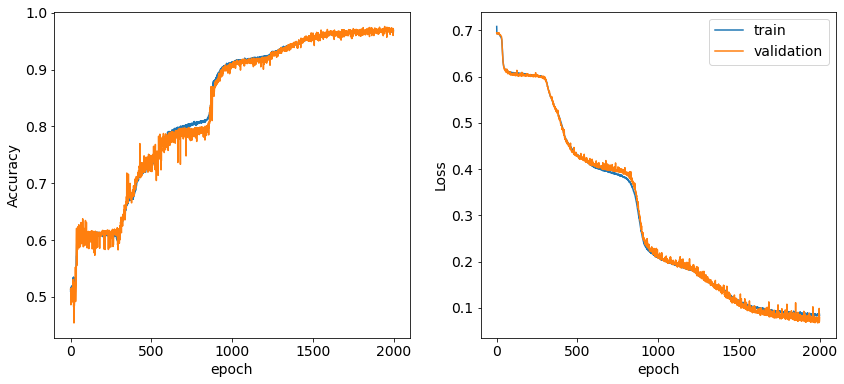

In [84]:
fig, AX = plt.subplots(1, 2, figsize=(14,6.))
ax = AX[0]
ax.plot(fit.history['accuracy'], label="train")
ax.plot(fit.history['val_accuracy'], label="validation")
ax.set_xlabel('epoch');  ax.set_ylabel("Accuracy");
ax = AX[1]
ax.plot(fit.history['loss'], label="train")
ax.plot(fit.history['val_loss'], label="validation")
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
if savefigs: plt.savefig(f'./img/{f_name}_error.pdf')

In [85]:
dX = 2
X1 = np.arange(-50, 50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG, 2))
k = 0
for i in range(LG):
    for j in range(LG):
        grid[k,:] = (X1[j], X1[i])
        k = k+1
grid_r = Rescale(grid)
pred = model.predict(grid_r)

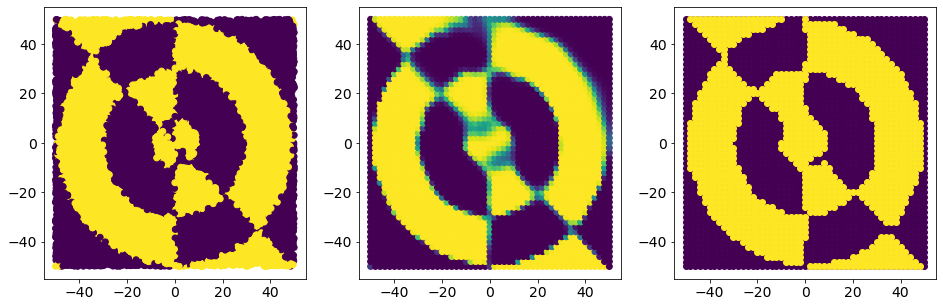

In [86]:
fig, AX = plt.subplots(1, 3, figsize=(16,5.))
ax = AX[0]
ax.scatter(x[:,0], x[:,1], c=y)
ax = AX[1]
ax.scatter(grid[:,0], grid[:,1], c=pred)
ax = AX[2]
W1 = np.where(pred > 0.5)[0] 
ax.scatter(grid[:,0], grid[:,1], c="#440154")
ax.scatter(grid[W1,0], grid[W1,1], c="#fde725")
if savefigs: plt.savefig(f'./img/{f_name}_prediction.pdf')

In [87]:
if dump_env: dill.dump_session('checkpoint_4a.db')

INFO:tensorflow:Assets written to: ram://6fff2245-08ce-4eb4-a3d9-91d15f4623ea/assets
INFO:tensorflow:Assets written to: ram://09e8f1f4-84e8-4813-b7e3-00e76ee1861d/assets


#### train DNN, but with 3 layers

In [88]:
#chosen_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam'}  # paste here the model to use

model = compile_model(**chosen_params, layers = (20, 20, 20))
model.compile(loss='binary_crossentropy', optimizer=best_params['optimizer'],metrics=['accuracy'])
fit = model.fit(x_train, y_train,  epochs = 2000, batch_size = 100,
                validation_data = (x_valid, y_valid), verbose = 2)

Epoch 1/2000
160/160 - 1s - loss: 0.6933 - accuracy: 0.5161 - val_loss: 0.6940 - val_accuracy: 0.5138 - 535ms/epoch - 3ms/step
Epoch 2/2000
160/160 - 0s - loss: 0.6928 - accuracy: 0.5182 - val_loss: 0.6928 - val_accuracy: 0.5138 - 100ms/epoch - 625us/step
Epoch 3/2000
160/160 - 0s - loss: 0.6927 - accuracy: 0.5209 - val_loss: 0.6938 - val_accuracy: 0.4823 - 105ms/epoch - 658us/step
Epoch 4/2000
160/160 - 0s - loss: 0.6927 - accuracy: 0.5173 - val_loss: 0.6926 - val_accuracy: 0.5165 - 104ms/epoch - 650us/step
Epoch 5/2000
160/160 - 0s - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6925 - val_accuracy: 0.5595 - 98ms/epoch - 613us/step
Epoch 6/2000
160/160 - 0s - loss: 0.6923 - accuracy: 0.5174 - val_loss: 0.6926 - val_accuracy: 0.4845 - 103ms/epoch - 643us/step
Epoch 7/2000
160/160 - 0s - loss: 0.6923 - accuracy: 0.5189 - val_loss: 0.6925 - val_accuracy: 0.5545 - 96ms/epoch - 600us/step
Epoch 8/2000
160/160 - 0s - loss: 0.6924 - accuracy: 0.5246 - val_loss: 0.6932 - val_accuracy: 0.5240

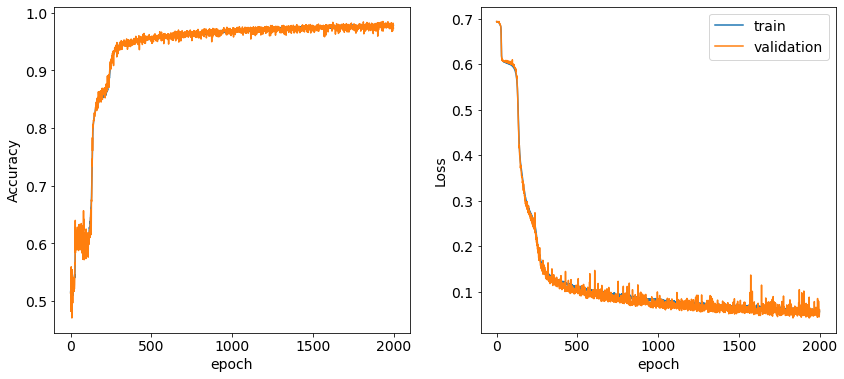

In [89]:
fig, AX = plt.subplots(1, 2, figsize=(14,6.))
ax = AX[0]
ax.plot(fit.history['accuracy'], label="train")
ax.plot(fit.history['val_accuracy'], label="validation")
ax.set_xlabel('epoch');  ax.set_ylabel("Accuracy");
ax = AX[1]
ax.plot(fit.history['loss'], label="train")
ax.plot(fit.history['val_loss'], label="validation")
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
if savefigs: plt.savefig(f'./img/{f_name}_error_3layers.pdf')

In [90]:
dX = 2
X1 = np.arange(-50, 50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG, 2))
k = 0
for i in range(LG):
    for j in range(LG):
        grid[k,:] = (X1[j], X1[i])
        k = k+1
grid_r = Rescale(grid)
pred = model.predict(grid_r)

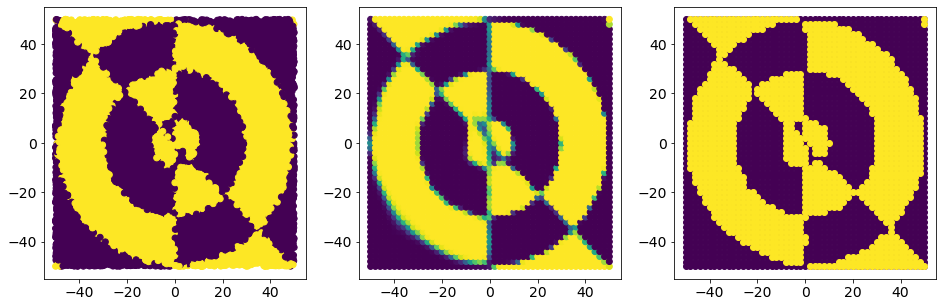

In [91]:
fig, AX = plt.subplots(1, 3, figsize=(16,5.))
ax = AX[0]
ax.scatter(x[:,0], x[:,1], c=y)
ax = AX[1]
ax.scatter(grid[:,0], grid[:,1], c=pred)
ax = AX[2]
W1 = np.where(pred > 0.5)[0] 
ax.scatter(grid[:,0], grid[:,1], c="#440154")
ax.scatter(grid[W1,0], grid[W1,1], c="#fde725")
if savefigs: plt.savefig(f'./img/{f_name}_prediction_3layers.pdf')

In [92]:
if dump_env: dill.dump_session('checkpoint_4b.db')

INFO:tensorflow:Assets written to: ram://87feea05-e185-4ba3-8440-7af0ab7ba936/assets
INFO:tensorflow:Assets written to: ram://1f58741c-44b2-45f5-8b25-891d277046aa/assets


### try another function #1

you selected multi_sphere


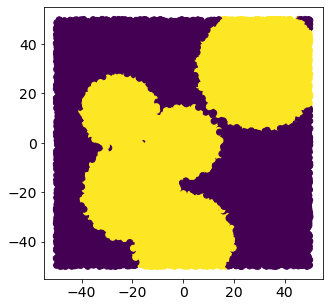

In [93]:
selection = 4
f = available_functions[selection]
f_name = available_functions_names[selection]
print(f'you selected {f_name}')
    
x = (np.random.random((N,n))-0.5)*B
y = np.zeros(N)

for i in range(N):  y[i] = f(x[i], n=2)  # label data according to the selected function

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
if savefigs: plt.savefig(f'./img/{f_name}.pdf')

In [94]:
N_train = int(len(x) * perc_train)
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 16000 	 Validation: 4000


In [95]:
x_train = x_train/50  # using the Rescale of point 1.x
x_valid = x_valid/50

#### train a DNN on the selected function

In [96]:
chosen_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam'} # paste here the model to use

model = compile_model(**chosen_params, layers = (20, 20))
model.compile(loss='binary_crossentropy', optimizer='Nadam',metrics=['accuracy'])
fit = model.fit(x_train, y_train,
                epochs = 1000, batch_size = 40,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/1000
400/400 - 1s - loss: 0.6938 - accuracy: 0.5869 - val_loss: 0.6725 - val_accuracy: 0.5888 - 563ms/epoch - 1ms/step
Epoch 2/1000
400/400 - 0s - loss: 0.6688 - accuracy: 0.6132 - val_loss: 0.6590 - val_accuracy: 0.6285 - 192ms/epoch - 481us/step
Epoch 3/1000
400/400 - 0s - loss: 0.6463 - accuracy: 0.6245 - val_loss: 0.6194 - val_accuracy: 0.6280 - 193ms/epoch - 482us/step
Epoch 4/1000
400/400 - 0s - loss: 0.5757 - accuracy: 0.7144 - val_loss: 0.5325 - val_accuracy: 0.7470 - 189ms/epoch - 472us/step
Epoch 5/1000
400/400 - 0s - loss: 0.5168 - accuracy: 0.7459 - val_loss: 0.5153 - val_accuracy: 0.7492 - 197ms/epoch - 494us/step
Epoch 6/1000
400/400 - 0s - loss: 0.5018 - accuracy: 0.7459 - val_loss: 0.4971 - val_accuracy: 0.7520 - 191ms/epoch - 477us/step
Epoch 7/1000
400/400 - 0s - loss: 0.4920 - accuracy: 0.7465 - val_loss: 0.4897 - val_accuracy: 0.7520 - 190ms/epoch - 476us/step
Epoch 8/1000
400/400 - 0s - loss: 0.4838 - accuracy: 0.7490 - val_loss: 0.4793 - val_accuracy: 0.75

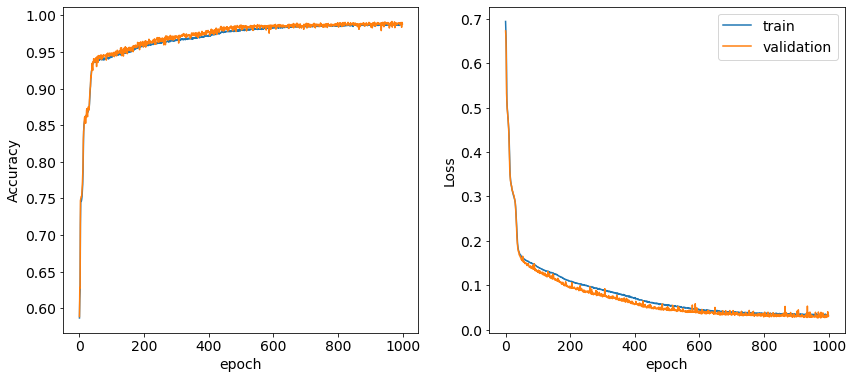

In [97]:
fig, AX = plt.subplots(1, 2, figsize=(14,6.))
ax = AX[0]
ax.plot(fit.history['accuracy'], label="train")
ax.plot(fit.history['val_accuracy'], label="validation")
ax.set_xlabel('epoch');  ax.set_ylabel("Accuracy");
ax = AX[1]
ax.plot(fit.history['loss'], label="train")
ax.plot(fit.history['val_loss'], label="validation")
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
if savefigs: plt.savefig(f'./img/{f_name}_error.pdf')

In [98]:
dX = 2
X1 = np.arange(-50, 50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG, 2))
k = 0
for i in range(LG):
    for j in range(LG):
        grid[k,:] = (X1[j], X1[i])
        k = k+1
grid_r = Rescale(grid)
pred = model.predict(grid_r)

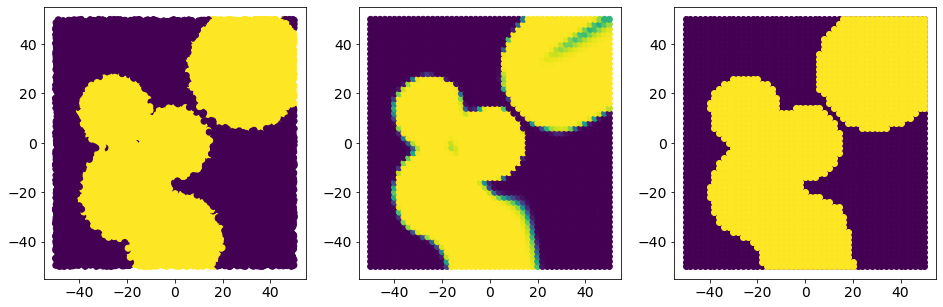

In [99]:
fig, AX = plt.subplots(1, 3, figsize=(16,5.))
ax = AX[0]
ax.scatter(x[:,0], x[:,1], c=y)
ax = AX[1]
ax.scatter(grid[:,0], grid[:,1], c=pred)
ax = AX[2]
W1 = np.where(pred > 0.5)[0] 
ax.scatter(grid[:,0], grid[:,1], c="#440154")
ax.scatter(grid[W1,0], grid[W1,1], c="#fde725")
if savefigs: plt.savefig(f'./img/{f_name}_prediction.pdf')

In [100]:
if dump_env: dill.dump_session('checkpoint_4c.db')

INFO:tensorflow:Assets written to: ram://6d00e4ca-7923-4af0-b514-77d46e5fa75a/assets
INFO:tensorflow:Assets written to: ram://6501f31a-667e-446f-8432-f15c82a97bd0/assets


### try another function #2

you selected mixed_chessboard


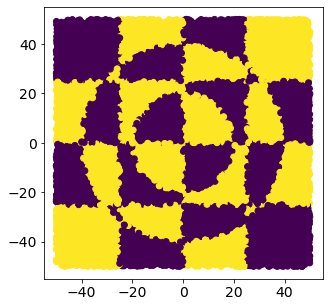

In [101]:
selection = -1
f = available_functions[selection]
f_name = available_functions_names[selection]
print(f'you selected {f_name}')
    
x = (np.random.random((N,n))-0.5)*B
y = np.zeros(N)

for i in range(N):  y[i] = f(x[i], n=2)  # label data according to the selected function

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
if savefigs: plt.savefig(f'./img/{f_name}.pdf')

In [102]:
N_train = int(len(x) * perc_train)
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 16000 	 Validation: 4000


In [103]:
x_train = x_train/50  # using the Rescale of point 1.x
x_valid = x_valid/50

#### train a DNN on the selected function

In [104]:
chosen_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam'} # paste here the model to use

model = compile_model(**chosen_params, layers = (20, 20, 20))
model.compile(loss='binary_crossentropy', optimizer='Nadam',metrics=['accuracy'])
fit = model.fit(x_train, y_train,
                epochs = 2000, batch_size = 40,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/2000
400/400 - 1s - loss: 0.6947 - accuracy: 0.4926 - val_loss: 0.6932 - val_accuracy: 0.5040 - 634ms/epoch - 2ms/step
Epoch 2/2000
400/400 - 0s - loss: 0.6942 - accuracy: 0.4977 - val_loss: 0.6934 - val_accuracy: 0.5040 - 210ms/epoch - 525us/step
Epoch 3/2000
400/400 - 0s - loss: 0.6941 - accuracy: 0.5026 - val_loss: 0.6955 - val_accuracy: 0.4960 - 220ms/epoch - 549us/step
Epoch 4/2000
400/400 - 0s - loss: 0.6939 - accuracy: 0.5049 - val_loss: 0.6942 - val_accuracy: 0.4960 - 205ms/epoch - 513us/step
Epoch 5/2000
400/400 - 0s - loss: 0.6937 - accuracy: 0.5031 - val_loss: 0.6928 - val_accuracy: 0.5573 - 209ms/epoch - 524us/step
Epoch 6/2000
400/400 - 0s - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6928 - val_accuracy: 0.4495 - 209ms/epoch - 523us/step
Epoch 7/2000
400/400 - 0s - loss: 0.6934 - accuracy: 0.5111 - val_loss: 0.6921 - val_accuracy: 0.5575 - 215ms/epoch - 538us/step
Epoch 8/2000
400/400 - 0s - loss: 0.6924 - accuracy: 0.5134 - val_loss: 0.6910 - val_accuracy: 0.46

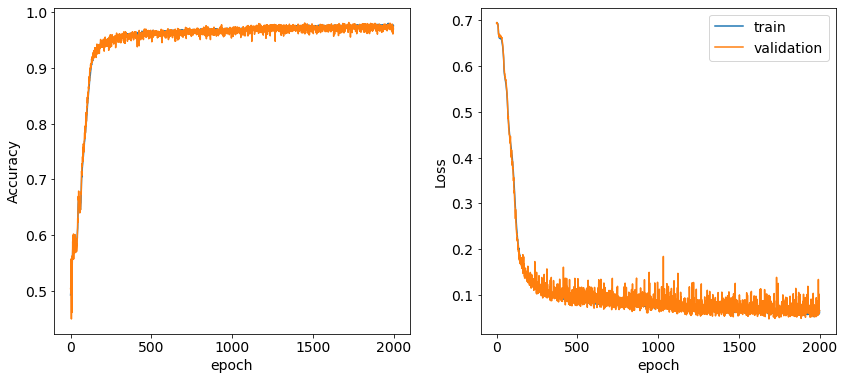

In [105]:
fig, AX = plt.subplots(1, 2, figsize=(14,6.))
ax = AX[0]
ax.plot(fit.history['accuracy'], label="train")
ax.plot(fit.history['val_accuracy'], label="validation")
ax.set_xlabel('epoch');  ax.set_ylabel("Accuracy");
ax = AX[1]
ax.plot(fit.history['loss'], label="train")
ax.plot(fit.history['val_loss'], label="validation")
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
if savefigs: plt.savefig(f'./img/{f_name}_error.pdf')

In [106]:
dX = 2
X1 = np.arange(-50, 50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG, 2))
k = 0
for i in range(LG):
    for j in range(LG):
        grid[k,:] = (X1[j], X1[i])
        k = k+1
grid_r = Rescale(grid)
pred = model.predict(grid_r)

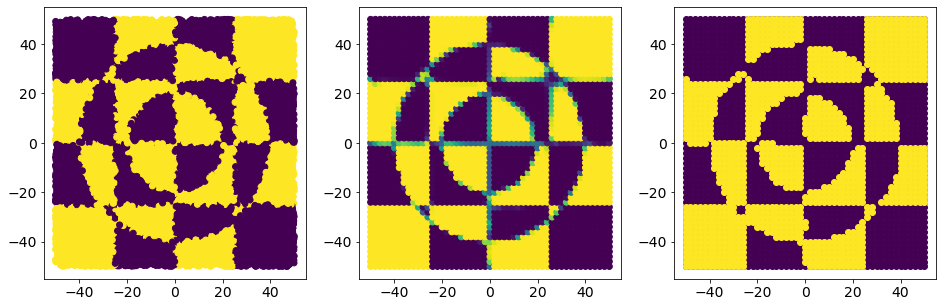

In [107]:
fig, AX = plt.subplots(1, 3, figsize=(16,5.))
ax = AX[0]
ax.scatter(x[:,0], x[:,1], c=y)
ax = AX[1]
ax.scatter(grid[:,0], grid[:,1], c=pred)
ax = AX[2]
W1 = np.where(pred > 0.5)[0] 
ax.scatter(grid[:,0], grid[:,1], c="#440154")
ax.scatter(grid[W1,0], grid[W1,1], c="#fde725")
if savefigs: plt.savefig(f'./img/{f_name}_prediction.pdf')

In [6]:
if dump_env: dill.dump_session('checkpoint_4d.db')

### try another function #2, but with data augmentation

you selected mixed_chessboard


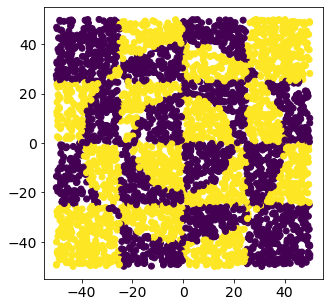

In [7]:
%run nonlinear_functions_others.py
selection = -1
f = available_functions[selection]
f_name = available_functions_names[selection]
print(f'you selected {f_name}')

N = 4000
    
x = (np.random.random((N,n))-0.5)*B
y = np.zeros(N)

for i in range(N):  y[i] = f(x[i], n=2)  # label data according to the selected function

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y)
if savefigs: plt.savefig(f'./img/{f_name}.pdf')

In [8]:
N_train = int(len(x) * perc_train)
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 3200 	 Validation: 800


### augment this dataset

In [9]:
augment_factor = 6 # data augmentation factor: approximately ((augment_factor-1)*len(x_train)) artificial data will be created
print('Augmentation factor: x', augment_factor)
dim = x_train.shape[1]
print('Dimensionality of the sample data:', dim)

# create a pandas DataFrame containing the training data
x_columns = [f'x{i}' for i in range(1, dim+1)]
df = pd.DataFrame(x_train, columns=x_columns)
df['y'] = y_train.astype(int)
#df

Augmentation factor: x 6
Dimensionality of the sample data: 2


In [10]:
x_augment = np.full((1, dim), np.nan)
y_augment = np.array(np.nan).reshape(1,)
print('x_augment.shape =', x_augment.shape)
print('y_augment.shape =', y_augment.shape)

ranges = np.array(df[x_columns].max()-df[x_columns].min())
mask_rel_size = 1/20 # mask relative size w.r.t. data range along each dimension 
mask_size = mask_rel_size*ranges
print('Data ranges along each dimension:', ranges)
print('Mask size:', mask_size)

n_masks = round((augment_factor-1)/((mask_rel_size)**dim))
print('Number of masks that will be created:', n_masks)

print("\nData augmentation in progress...")
for i in range(n_masks):

    sample = np.array(df[x_columns].sample()).reshape(dim,) # random sample from the DataFrame containing the training data

    mask = True
    for j, xj in enumerate(x_columns):
        mask = mask & ((df[xj] >= (sample[j]-(mask_size[j]/2))) & (df[xj] <= (sample[j]+(mask_size[j]/2))))

    df_masked = df[mask]
    n_zeros = (df_masked['y'] == 0).sum() # number of samples in df_masked with label y = 0
    n_ones = len(df_masked)-n_zeros       # number of samples in df_masked with label y = 1
    most_freq_ratio = max(n_zeros, n_ones)/len(df_masked) # most frequent label ratio
    amplitude = 3*(most_freq_ratio**3)

    dx = amplitude*np.random.uniform(low=-1, high=+1, size=df_masked[x_columns].shape) # vector of random displacements
    x_augment = np.append(x_augment, df_masked[x_columns]+dx, axis=0)
    y_augment = np.append(y_augment, df_masked['y'], axis=0)

    #print(f'Mask #{i} | sample: {sample}, len(df_masked): {len(df_masked)}, most_freq_ratio: {most_freq_ratio}')

print("Done!")

x_augment = x_augment[1:] # drop the initial NaN
y_augment = y_augment[1:] # drop the initial NaN

# create a pandas DataFrame containing the artificial dataset
print('\nCreating a pandas DataFrame containing the artificial dataset...')
df_augment = pd.DataFrame(x_augment, columns=x_columns)
df_augment['y'] = y_augment.astype(int)

x_augment.shape = (1, 2)
y_augment.shape = (1,)
Data ranges along each dimension: [99.95962982 99.89695051]
Mask size: [4.99798149 4.99484753]
Number of masks that will be created: 2000

Data augmentation in progress...
Done!

Creating a pandas DataFrame containing the artificial dataset...


In [11]:
df_augment

x1         x2  y
0      47.951912  26.420173  1
1      45.752305  29.927330  1
2      48.566035  28.776967  1
3      47.503438  28.946519  1
4      47.010204  28.771380  1
...          ...        ... ..
17775  32.342760 -37.358316  0
17776  31.258019 -36.489318  0
17777  37.156563 -38.007788  0
17778  32.744483 -35.114775  0
17779  37.069976 -34.271454  0

[17780 rows x 3 columns]

x_train shape: (20980, 2)
y_train shape: (20980,)


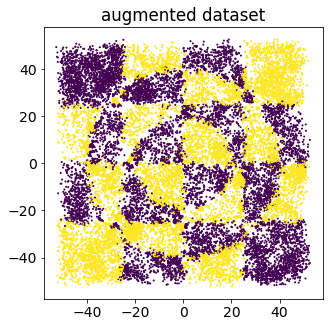

In [12]:
# concatenate the artificial dataset to the training dataset
x_train = np.concatenate((x_train, x_augment), axis=0)
y_train = np.concatenate((y_train, y_augment), axis=0)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

plt.figure(figsize=(5,5))
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=1)
plt.title('augmented dataset')
if savefigs: plt.savefig(f'./img/{f_name}_dataset_augmented.pdf')

In [13]:
# rescale input data  (uses the function defined in 1A!
x_train = x_train/50;   x_valid = x_valid/50;

#### train a DNN on the selected function

In [26]:
chosen_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam', 'init' : 'glorot_normal'} # paste here the model to use

model = compile_model(**chosen_params, layers = (20, 20, 20))
model.compile(loss='binary_crossentropy', optimizer='Nadam',metrics=['accuracy'])
fit = model.fit(x_train, y_train,
                epochs = 500, batch_size = 40,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/500
525/525 - 1s - loss: 0.6936 - accuracy: 0.5066 - val_loss: 0.6951 - val_accuracy: 0.4775 - 843ms/epoch - 2ms/step
Epoch 2/500
525/525 - 0s - loss: 0.6934 - accuracy: 0.5055 - val_loss: 0.6927 - val_accuracy: 0.5225 - 248ms/epoch - 472us/step
Epoch 3/500
525/525 - 0s - loss: 0.6929 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5225 - 266ms/epoch - 506us/step
Epoch 4/500
525/525 - 0s - loss: 0.6909 - accuracy: 0.5093 - val_loss: 0.6933 - val_accuracy: 0.5088 - 264ms/epoch - 504us/step
Epoch 5/500
525/525 - 0s - loss: 0.6616 - accuracy: 0.5847 - val_loss: 0.7091 - val_accuracy: 0.5200 - 243ms/epoch - 462us/step
Epoch 6/500
525/525 - 0s - loss: 0.6304 - accuracy: 0.6164 - val_loss: 0.6991 - val_accuracy: 0.5387 - 242ms/epoch - 462us/step
Epoch 7/500
525/525 - 0s - loss: 0.6282 - accuracy: 0.6174 - val_loss: 0.7031 - val_accuracy: 0.5325 - 248ms/epoch - 472us/step
Epoch 8/500
525/525 - 0s - loss: 0.6276 - accuracy: 0.6168 - val_loss: 0.7016 - val_accuracy: 0.5150 - 250

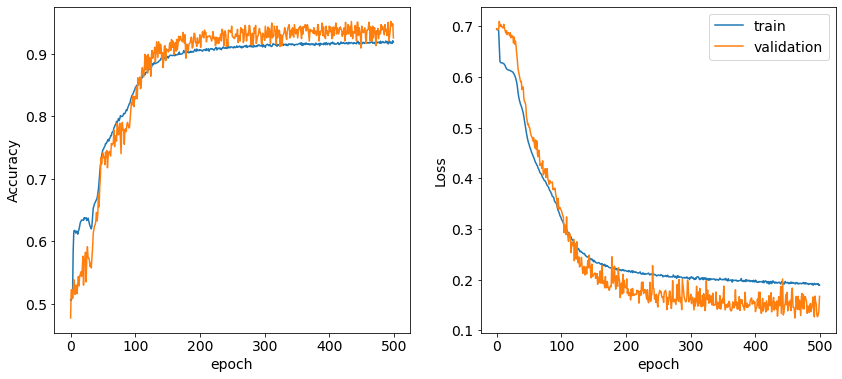

In [27]:
fig, AX = plt.subplots(1, 2, figsize=(14,6.))
ax = AX[0]
ax.plot(fit.history['accuracy'], label="train")
ax.plot(fit.history['val_accuracy'], label="validation")
ax.set_xlabel('epoch');  ax.set_ylabel("Accuracy");
ax = AX[1]
ax.plot(fit.history['loss'], label="train")
ax.plot(fit.history['val_loss'], label="validation")
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
if savefigs: plt.savefig(f'./img/{f_name}_error_augm_500.pdf')

In [28]:
dX = 2
X1 = np.arange(-50, 50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG, 2))
k = 0
for i in range(LG):
    for j in range(LG):
        grid[k,:] = (X1[j], X1[i])
        k = k+1
grid_r = Rescale(grid)
pred = model.predict(grid_r)

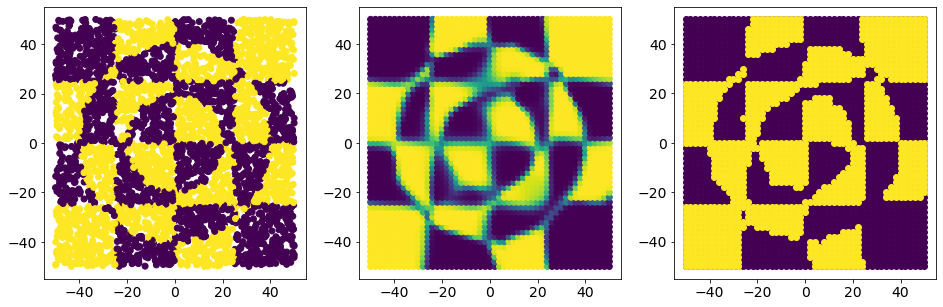

In [29]:
fig, AX = plt.subplots(1, 3, figsize=(16,5.))
ax = AX[0]
ax.scatter(x[:,0], x[:,1], c=y)
ax = AX[1]
ax.scatter(grid[:,0], grid[:,1], c=pred)
ax = AX[2]
W1 = np.where(pred > 0.5)[0] 
ax.scatter(grid[:,0], grid[:,1], c="#440154")
ax.scatter(grid[W1,0], grid[W1,1], c="#fde725")
if savefigs: plt.savefig(f'./img/{f_name}_prediction_augm_500.pdf')

In [35]:
chosen_params = {'activation': 'softplus', 'dropout_rate': 0.0, 'optimizer': 'Nadam', 'init' : 'glorot_normal'} # paste here the model to use

model = compile_model(**chosen_params, layers = (20, 20, 20))
model.compile(loss='binary_crossentropy', optimizer='Nadam',metrics=['accuracy'])
fit = model.fit(x_train, y_train,
                epochs = 600, batch_size = 60,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/600
350/350 - 1s - loss: 0.7047 - accuracy: 0.5139 - val_loss: 0.6998 - val_accuracy: 0.4800 - 605ms/epoch - 2ms/step
Epoch 2/600
350/350 - 0s - loss: 0.6900 - accuracy: 0.5148 - val_loss: 0.6953 - val_accuracy: 0.4700 - 185ms/epoch - 527us/step
Epoch 3/600
350/350 - 0s - loss: 0.6841 - accuracy: 0.5298 - val_loss: 0.7003 - val_accuracy: 0.4650 - 191ms/epoch - 547us/step
Epoch 4/600
350/350 - 0s - loss: 0.6783 - accuracy: 0.5470 - val_loss: 0.6995 - val_accuracy: 0.5312 - 193ms/epoch - 553us/step
Epoch 5/600
350/350 - 0s - loss: 0.6693 - accuracy: 0.5709 - val_loss: 0.6944 - val_accuracy: 0.5350 - 183ms/epoch - 522us/step
Epoch 6/600
350/350 - 0s - loss: 0.6470 - accuracy: 0.6116 - val_loss: 0.6946 - val_accuracy: 0.5462 - 178ms/epoch - 509us/step
Epoch 7/600
350/350 - 0s - loss: 0.6333 - accuracy: 0.6314 - val_loss: 0.7097 - val_accuracy: 0.5675 - 190ms/epoch - 542us/step
Epoch 8/600
350/350 - 0s - loss: 0.6315 - accuracy: 0.6289 - val_loss: 0.7012 - val_accuracy: 0.5575 - 177

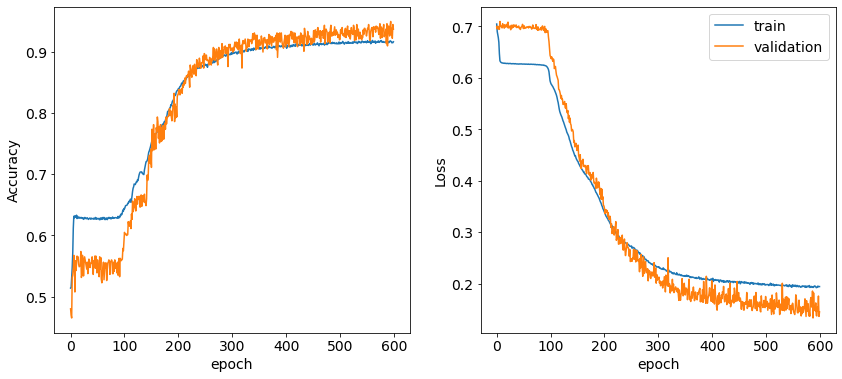

In [36]:
fig, AX = plt.subplots(1, 2, figsize=(14,6.))
ax = AX[0]
ax.plot(fit.history['accuracy'], label="train")
ax.plot(fit.history['val_accuracy'], label="validation")
ax.set_xlabel('epoch');  ax.set_ylabel("Accuracy");
ax = AX[1]
ax.plot(fit.history['loss'], label="train")
ax.plot(fit.history['val_loss'], label="validation")
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
if savefigs: plt.savefig(f'./img/{f_name}_error_augm_600.pdf')

In [37]:
dX = 2
X1 = np.arange(-50, 50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG, 2))
k = 0
for i in range(LG):
    for j in range(LG):
        grid[k,:] = (X1[j], X1[i])
        k = k+1
grid_r = Rescale(grid)
pred = model.predict(grid_r)

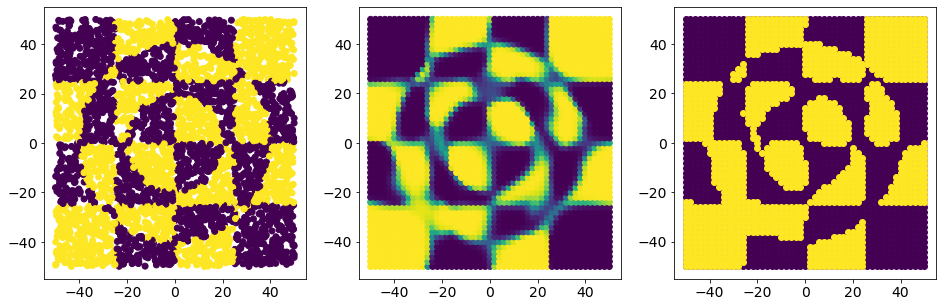

In [38]:
fig, AX = plt.subplots(1, 3, figsize=(16,5.))
ax = AX[0]
ax.scatter(x[:,0], x[:,1], c=y)
ax = AX[1]
ax.scatter(grid[:,0], grid[:,1], c=pred)
ax = AX[2]
W1 = np.where(pred > 0.5)[0] 
ax.scatter(grid[:,0], grid[:,1], c="#440154")
ax.scatter(grid[W1,0], grid[W1,1], c="#fde725")
if savefigs: plt.savefig(f'./img/{f_name}_prediction_augm_600.pdf')

In [ ]:
if dump_env: dill.dump_session('checkpoint_4e.db')

End of file